In [32]:
import time
import numpy as np
import pandas as pd
import seaborn as sb
from IPython.display import display, clear_output 
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# set random seed to achieve same results each time
np.random.seed(23)

In [20]:
class FacialKeypoints():
    
    def __init__(self):
        self.train_csv = pd.read_csv("training.csv")
        self.test_csv = pd.read_csv("test.csv")
        self.sample_csv = pd.read_csv("SampleSubmission.csv")
        self.ID_csv = pd.read_csv("IdLookupTable.csv")
        self.label_names = self.train_csv.columns.tolist()[:-1]
        self.dev_data_n, self.dev_labels_n, self.train_data_n, self.train_labels_n = self.create_training(self.train_csv)
        self.dev_data, self.dev_labels, self.train_data, self.train_labels = self.create_training(self.train_csv, nans=False)
        self.knn = self.K_nn()
    
    def create_training(self, train_csv, dev_size=1000, nans=True):
        if nans == False:
            train_csv = train_csv.dropna()
        labels = train_csv.loc[:, train_csv.columns != 'Image'].values
        data = train_csv['Image'].str.split()
        data = np.vstack(data.apply(lambda row: np.asarray([int(n) for n in row])).values)
        data = data/255.0                                         # Rescale grayscale values to [0,1].
        shuffle = np.random.permutation(np.arange(data.shape[0])) # Shuffle the data
        data, labels = data[shuffle], labels[shuffle]             # Splitting into dev and training
        dev_data, dev_labels   = data[:dev_size], labels[:dev_size]
        train_data, train_labels = data[dev_size:], labels[dev_size:]
        return dev_data, dev_labels, train_data, train_labels
    
    def plot_example(self, data, label, predicted_label=np.nan):
        plt.imshow(data.reshape(96, 96), cmap='gray')
        plt.scatter(label[0::2], label[1::2], c='red', marker='x')
        if np.all(np.isfinite(predicted_label)):
            plt.scatter(predicted_label[0::2], predicted_label[1::2], c='blue', marker='x')
        plt.axis('off')
        return
    
    def score(self, y_pred, y_actual):
        return np.sqrt(mean_squared_error(y_actual, y_pred))
    
    def preprocessor():
        return
    
    def generate_training():
        return
    
    def blur_training():
        return
    
    def K_nn(self, n_neighbors=3):
        knn = KNeighborsRegressor(n_neighbors)
        knn.fit(self.train_data, self.train_labels)
        return knn
    
    def LogReg(alpha):
        return
    
    def MLPRegressor():
        return
    
    pass

## Initialize the Object

In [21]:
self = FacialKeypoints()

## Plot an Example

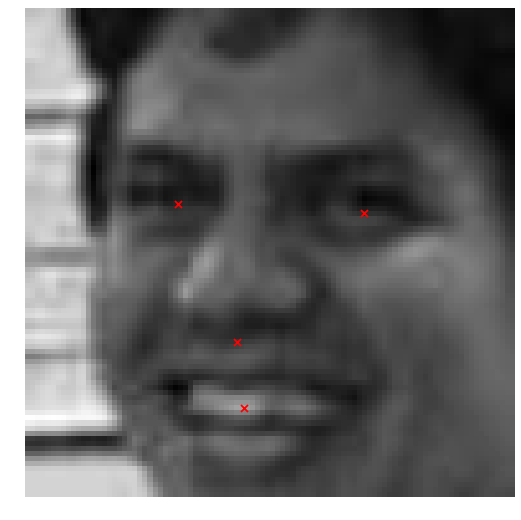

In [26]:
self.plot_example(self.train_data_n[0], self.train_labels_n[0]) # from incomplete labels

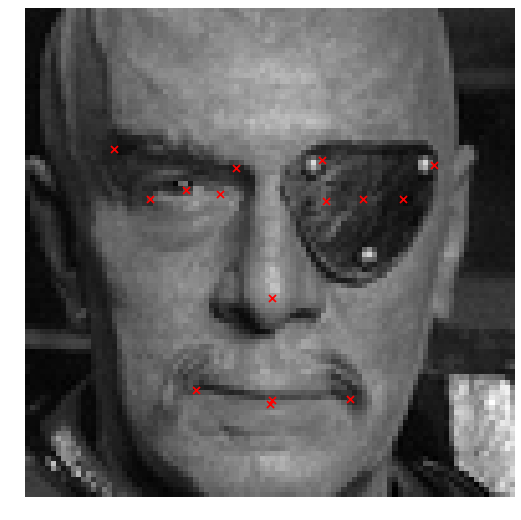

In [23]:
self.plot_example(self.train_data[25], self.train_labels[25]) # from complete labels

## K-NN

In [24]:
y_pred = self.knn.predict(self.dev_data) # this is a stored method that trains on train data then returns KNN object

In [31]:
self.score(self.dev_labels, y_pred)

2.5470062880464419

## Plot a Prediction

RMSE of 1.95508990743


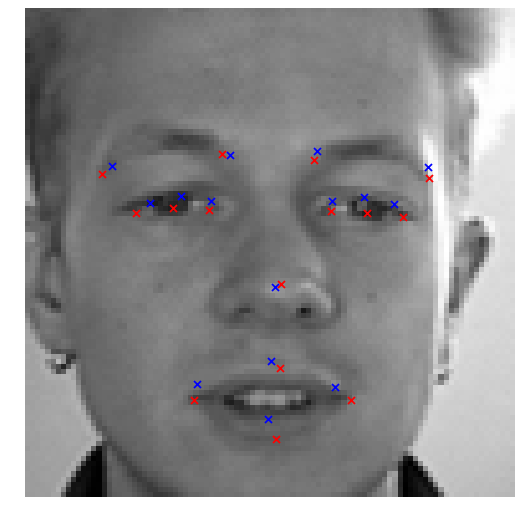

In [49]:
print ('RMSE of '+ str((self.score(self.dev_labels[25], y_pred[25]))))
self.plot_example(self.dev_data[25], self.dev_labels[25], y_pred[25])

## Logistic Regression

## Neural Net

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(6000, 3000, 1000))

mlp.fit(self.train_data, self.train_labels)

In [50]:
y_pred = mlp.predict(self.dev_data)

In [52]:
self.score(self.dev_labels, y_pred)

9.8065517911094382

## Grid Search to Find Best Parameters

In [ ]:
knn = KNeighborsRegressor()
parameters ={'n_neighbors': range(1, 25)}
clf = GridSearchCV(knn, parameters)
clf.fit(self.train_data, self.train_labels)
clf.best_params_